In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import twitter_samples

In [2]:
nltk.download('twitter_samples')
nltk.download('vader_lexicon')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
#get 5000 positive and negative tweets
all_positive_tweets=twitter_samples.strings('positive_tweets.json')
all_negative_tweets=twitter_samples.strings('negative_tweets.json')

analyzer=SentimentIntensityAnalyzer()

In [4]:
all_positive_tweets[1]

'@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!'

In [5]:
len(all_positive_tweets)

5000

In [ ]:
len(all_negative_tweets)

In [6]:
#positive
all_positive_tweets[2500]

'@Nigella_Lawson Lemons  bought for yogurt pot cake. Discovered yogurt out of date!  lemon version of liquorice pud possible do you think? :)'

In [7]:
analyzer.polarity_scores(all_positive_tweets[100])

{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.8476}

In [8]:
analyzer.polarity_scores(all_negative_tweets[20])

{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.6597}

In [9]:
#notice that VADER
#It is case sensitive. The sentence This is great has a different score than the sentence.
#This is GREAT. Punctuation matters. The exclamation marks for example have a positive score.
#The emojis have also a score and actually very strong sentiments.
#Try the <3,:) and :( words after @ and # have a neutral score.

In [10]:
my_labels=[1]*len(all_positive_tweets)
negative_labels=[0]*len(all_negative_tweets)
my_labels.extend(negative_labels)

all_positive_tweets.extend(all_negative_tweets)

df=pd.DataFrame({'tweets':all_positive_tweets,
                 'my_labels':my_labels})
df

,tweets,my_labels
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
9995,I wanna change my avi but uSanele :(,0
9996,MY PUPPY BROKE HER FOOT :(,0
9997,where's all the jaebum baby pictures :((,0
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0


In [11]:
df['neg']=df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu']=df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos']=df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound']=df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df


,tweets,my_labels,neg,neu,pos,compound
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,0.000,0.615,0.385,0.7579
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,0.145,0.585,0.270,0.6229
2,@DespiteOfficial we had a listen last night :)...,1,0.000,0.706,0.294,0.7959
3,@97sides CONGRATS :),1,0.000,0.123,0.877,0.7983
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,0.000,0.718,0.282,0.7950
...,...,...,...,...,...,...
9995,I wanna change my avi but uSanele :(,0,0.391,0.609,0.000,-0.5927
9996,MY PUPPY BROKE HER FOOT :(,0,0.617,0.383,0.000,-0.7531
9997,where's all the jaebum baby pictures :((,0,0.000,1.000,0.000,0.0000
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0,0.325,0.675,0.000,-0.5927


In [12]:
df.groupby('my_labels')['compound'].describe()

,count,mean,std,min,25%,50%,75%,max
my_labels,,,,,,,,
0,5000.0,-0.265929,0.425569,-0.9686,-0.5719,-0.4404,0.000,0.9781
1,5000.0,0.579837,0.305246,-0.9576,0.4588,0.6597,0.802,0.9872


<Axes: title={'center': 'compound'}, xlabel='my_labels'>

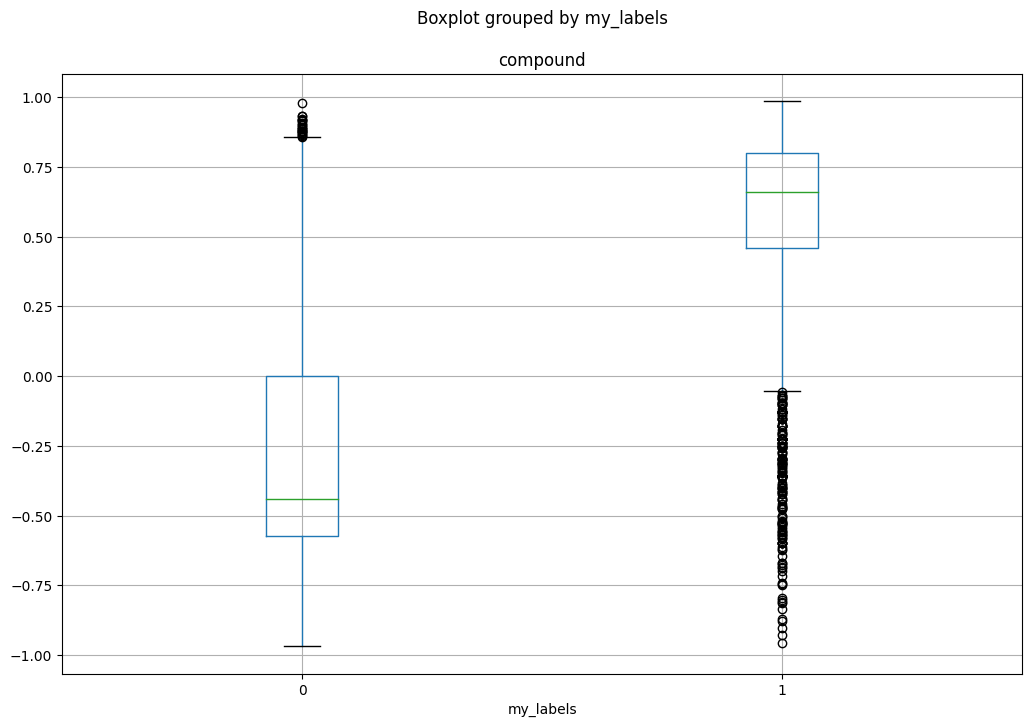

In [13]:
df.boxplot(by='my_labels',column='compound',figsize=(12,8))